<h3> 1. Loading Data</h3>

In [44]:
import pandas as pd
import numpy as np
 
filename1="C:\\Users\\aitma\\Downloads\\home-data-for-ml-course\\train.csv"
filename2="C:\\Users\\aitma\\Downloads\\home-data-for-ml-course\\test.csv"
df=pd.read_csv(filename1)
df_test=pd.read_csv(filename2)


1. Train Data


In [45]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Test Data

In [46]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [47]:
len(df_test)

1459

In [48]:
#check if there is a null value
null_col=[]
for i in df.columns:
    a=df[i].isnull().sum()
    if(a!=0):
        
        null_col.append(i)
        print("{} = {}".format(i,a))
print(null_col) 

LotFrontage = 259
Alley = 1369
MasVnrType = 8
MasVnrArea = 8
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinType2 = 38
Electrical = 1
FireplaceQu = 690
GarageType = 81
GarageYrBlt = 81
GarageFinish = 81
GarageQual = 81
GarageCond = 81
PoolQC = 1453
Fence = 1179
MiscFeature = 1406
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


<h1>2. Cleaning Data</h1>

1. Drop the features which have more then 75% null values

In [49]:
#drop columns that contain more than 1000 values null

droped_col_df=[]
droped_col_test=[]
for i in df.columns:
    a=df[i].isnull().sum()
    if(a>1000):
        droped_col_df.append(i)
for i in df_test.columns:
    a=df_test[i].isnull().sum()
    if(a>1000):
        droped_col_test.append(i)
        


In [50]:
df=df.drop(droped_col_df,axis=1)
df_test=df_test.drop(droped_col_test,axis=1)


- check if there is another columns with more than 75% null value

In [51]:
droped_col_df=[]
droped_col_test=[]
for i in df.columns:
    a=df[i].isnull().sum()
    if(a>1000):
        droped_col_df.append(i)
for i in df_test.columns:
    a=df_test[i].isnull().sum()
    if(a>1000):
        droped_col_test.append(i)

In [52]:
droped_col_test

[]

In [53]:
droped_col_df

[]

the features which have more then 75% null values are droped

2.  replace null values in numeric columns by the mean  

---------------------Train Data------------------------------------

In [54]:
df_number_train= df.select_dtypes(include='number')
for i in df_number_train.columns:
    df[i].replace([np.nan], df[i].mean(), inplace=True)
          

null_col2=[]


for i in df_number_train.columns:
    a=df[i].isnull().sum()
    if(a!=0):
        null_col2.append(i)
      

print("the number of null values is :",len(null_col2))



the number of null values is : 0


--------------------Test Data----------------------------

In [55]:
df_number_test= df_test.select_dtypes(include='number')
for i in df_number_test.columns:
    df_test[i].replace([np.nan], df_test[i].mean(), inplace=True)
          

null_col2=[]


for i in df_number_test.columns:
    a=df_test[i].isnull().sum()
    if(a!=0):
        null_col2.append(i)
      

print("the number of null values is  :",len(null_col2))

the number of null values is  : 0


3.   replace null values in Object columns by the most frequence Object in each feature 

---------------------------Train Data ------------------------------

In [56]:
for i in df.select_dtypes(include='object'):
    a=df[i].isna().sum()
    print("{} = {}".format(i,a))

MSZoning = 0
Street = 0
LotShape = 0
LandContour = 0
Utilities = 0
LotConfig = 0
LandSlope = 0
Neighborhood = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 0
Exterior2nd = 0
MasVnrType = 8
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinType2 = 38
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 1
KitchenQual = 0
Functional = 0
FireplaceQu = 690
GarageType = 81
GarageFinish = 81
GarageQual = 81
GarageCond = 81
PavedDrive = 0
SaleType = 0
SaleCondition = 0


In [57]:
#replace null values in Object columns by the most frequence Object in each feature 
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

# to check if there is  a null value again
null_col_str2=[]
for i in df.select_dtypes(include='object'):
    a=df[i].isna().sum()
    if(a!=0):
        null_col_str2.append(i)
        print("{} = {}".format(i,a))
print("the number of null values in Object features is :",len(null_col_str2)) 

the number of null values in Object features is : 0


--------------------Test Data-------------------------------------

In [58]:
for i in df_test.select_dtypes(include='object'):
    a=df_test[i].isna().sum()
    print("{} = {}".format(i,a))

MSZoning = 4
Street = 0
LotShape = 0
LandContour = 0
Utilities = 2
LotConfig = 0
LandSlope = 0
Neighborhood = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 1
Exterior2nd = 1
MasVnrType = 16
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 44
BsmtCond = 45
BsmtExposure = 44
BsmtFinType1 = 42
BsmtFinType2 = 42
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 0
KitchenQual = 1
Functional = 2
FireplaceQu = 730
GarageType = 76
GarageFinish = 78
GarageQual = 78
GarageCond = 78
PavedDrive = 0
SaleType = 1
SaleCondition = 0


In [59]:

#replace null values in Object columns by the most frequence Object in each feature 
df_test = df_test.apply(lambda x: x.fillna(x.value_counts().index[0]))

# to check if there is  a null value again
null_col_str2=[]
for i in df_test.select_dtypes(include='object'):
    a=df_test[i].isna().sum()
    if(a!=0):
        null_col_str2.append(i)
        print("{} = {}".format(i,a))
print("the number of null values in Object features is :",len(null_col_str2)) 

the number of null values in Object features is : 0


3.   Calculating Correlation between Numeric Features 

-------------------------Train Data-----------------------------

In [60]:
inde_var=result1.columns[:-1]
liste_corr=[]
for i in inde_var:
    liste_corr.append(np.corrcoef(df[i],df["SalePrice"]))
liste_corr2=[]
for i in liste_corr:
    if( i[0][0]!=1):
         liste_corr2.append(i[0][0])
    else:
         liste_corr2.append(i[0][1])
len(liste_corr2)  

df_corr=pd.DataFrame()

df_corr["Variables"]=inde_var
df_corr["Correlation With SalePrice"]=liste_corr2

df_corr



NameError: name 'result1' is not defined

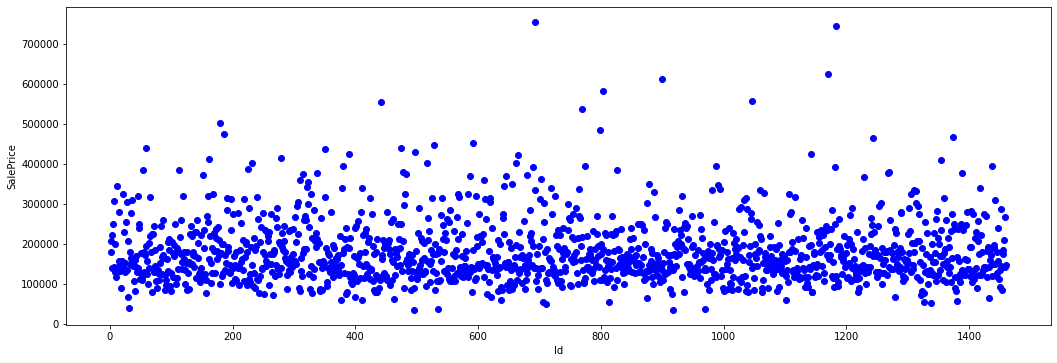

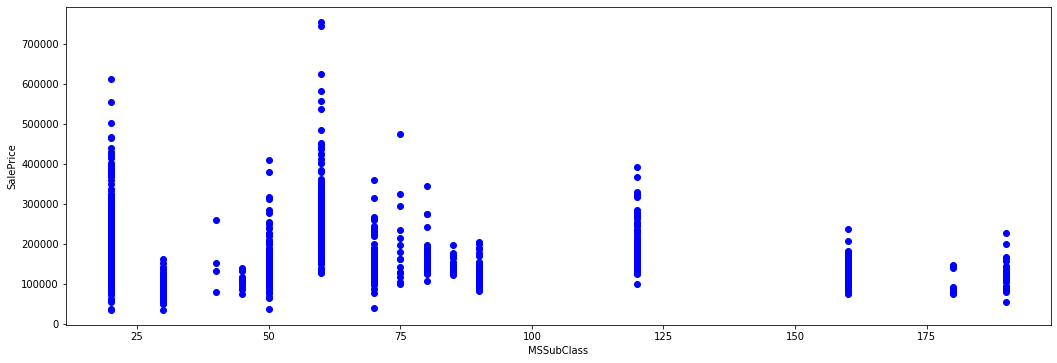

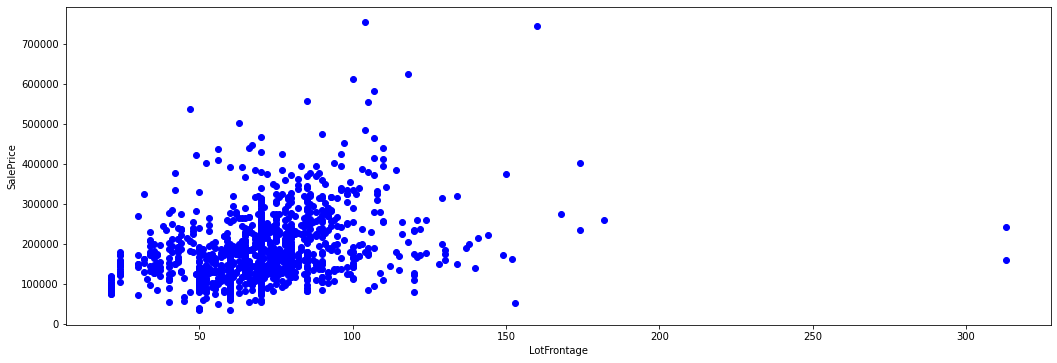

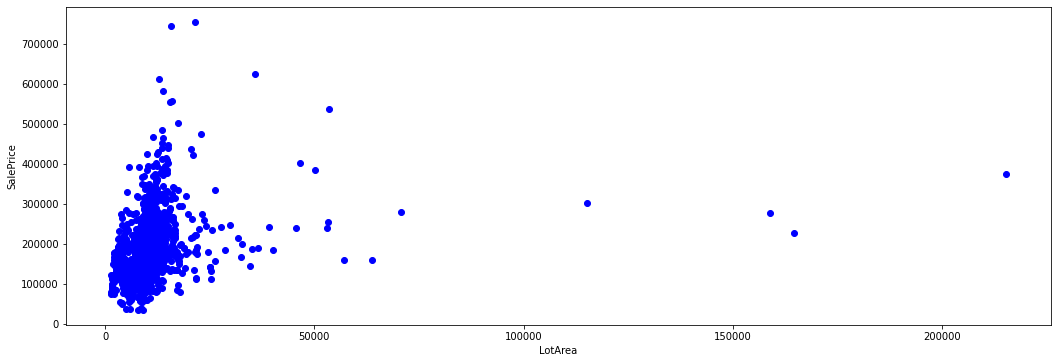

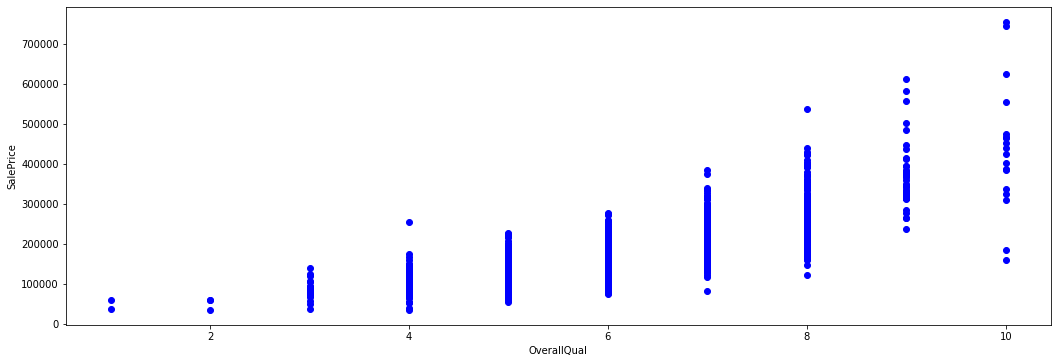

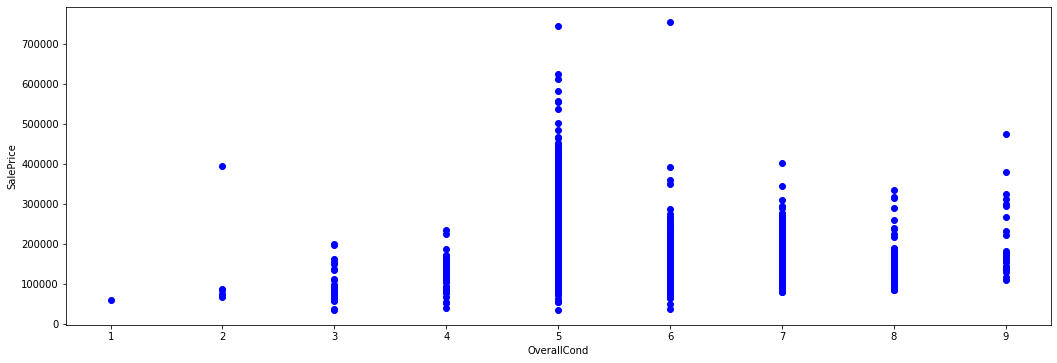

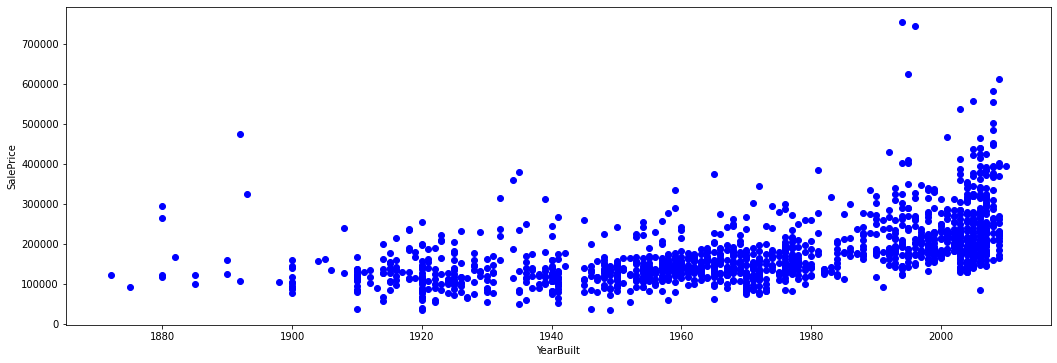

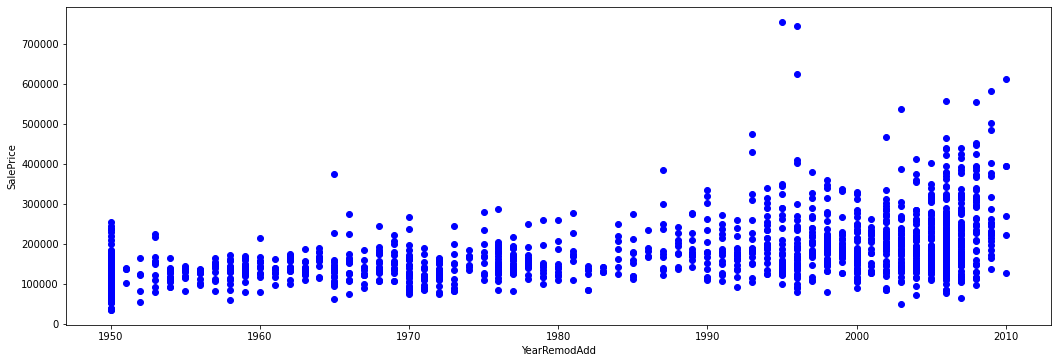

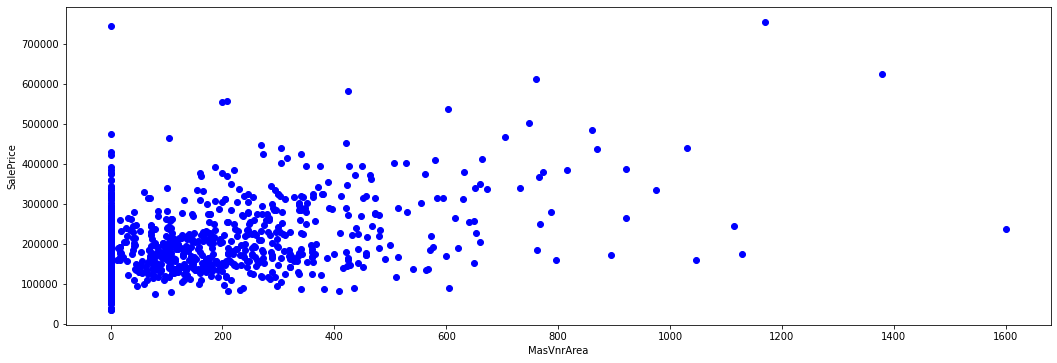

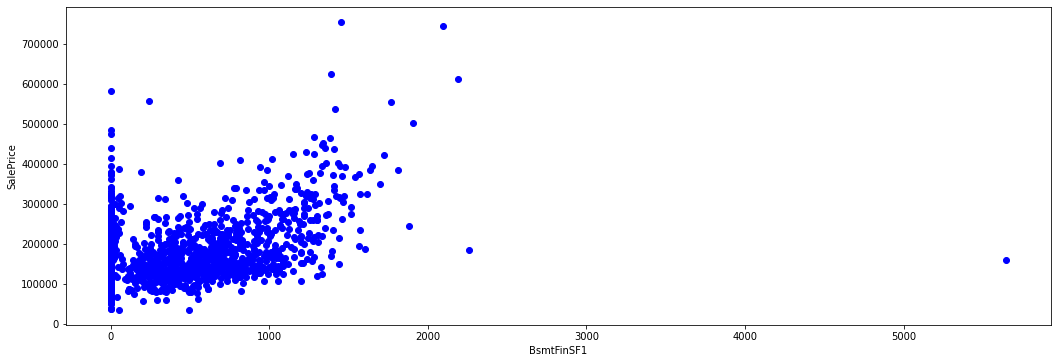

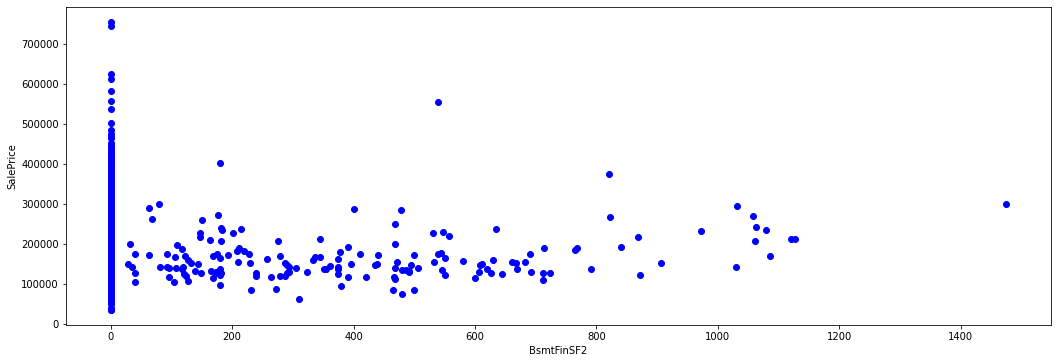

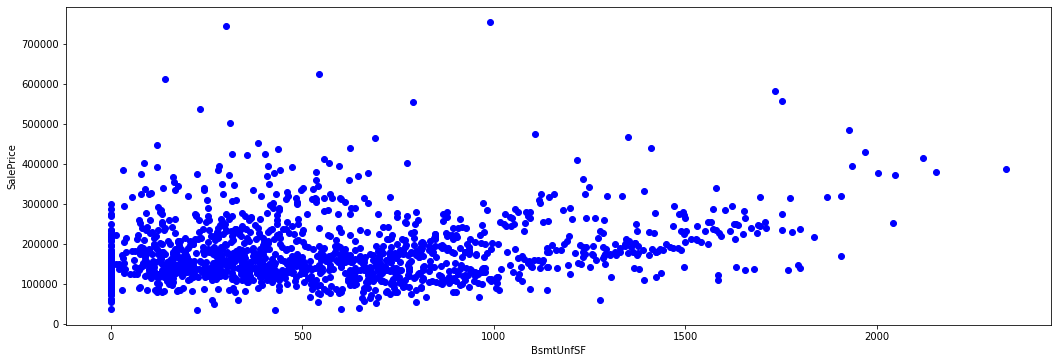

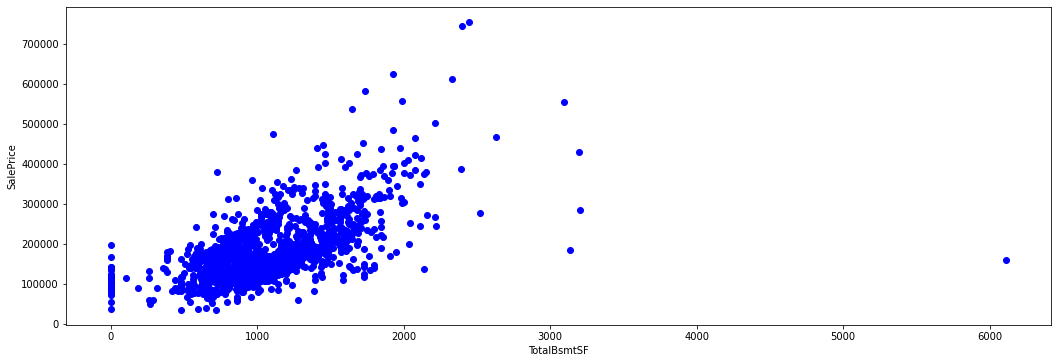

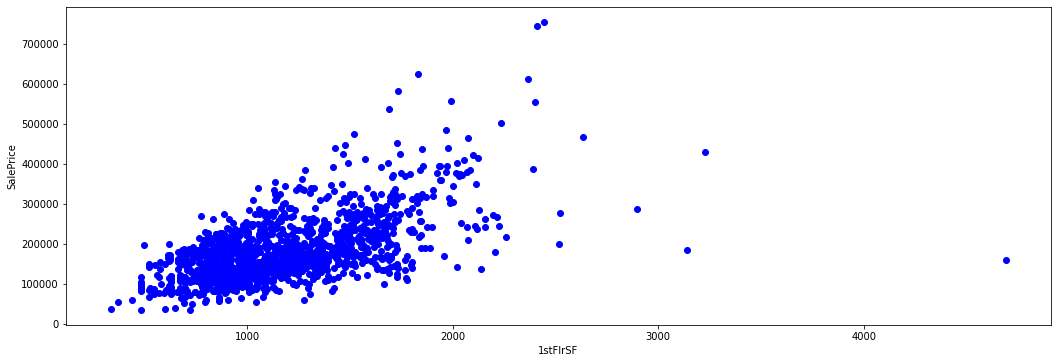

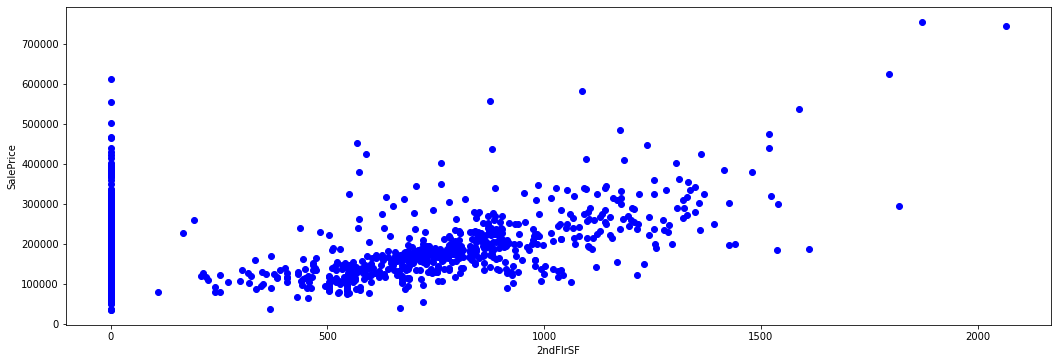

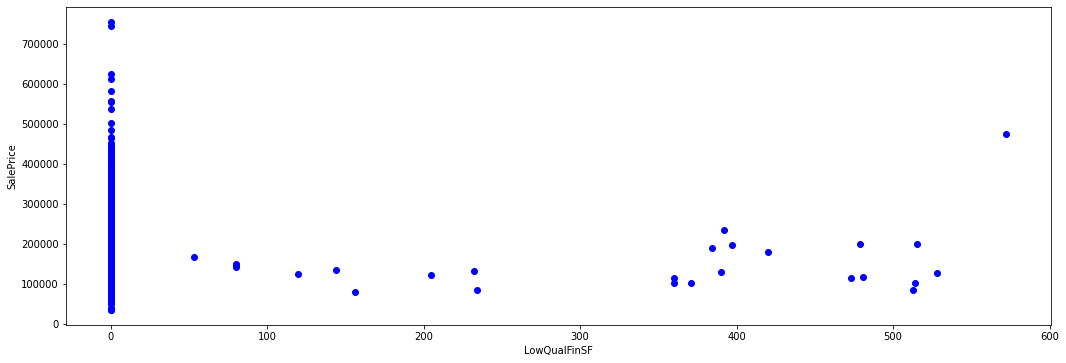

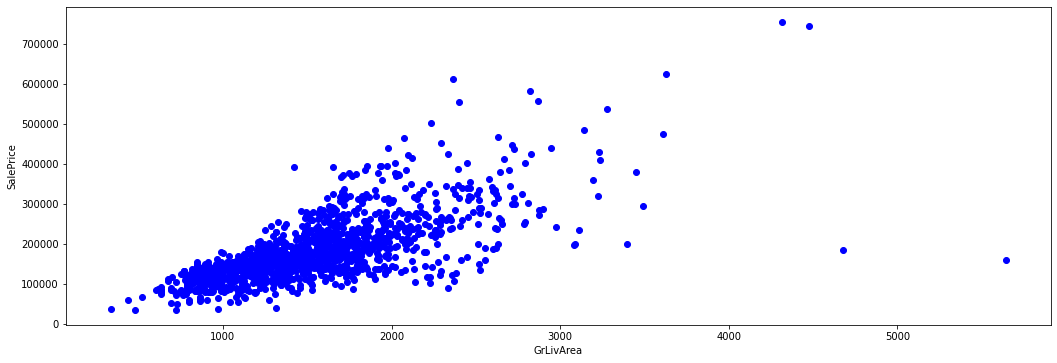

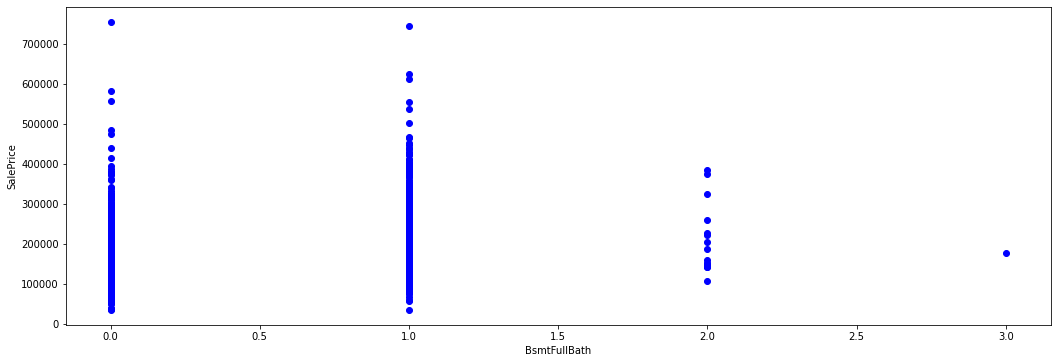

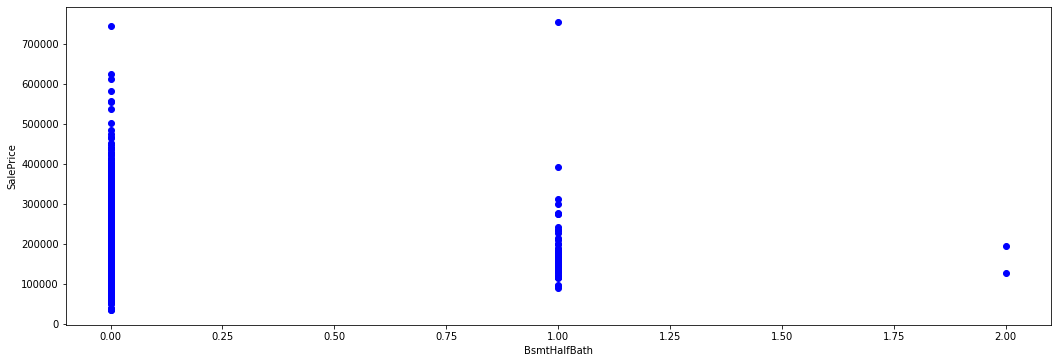

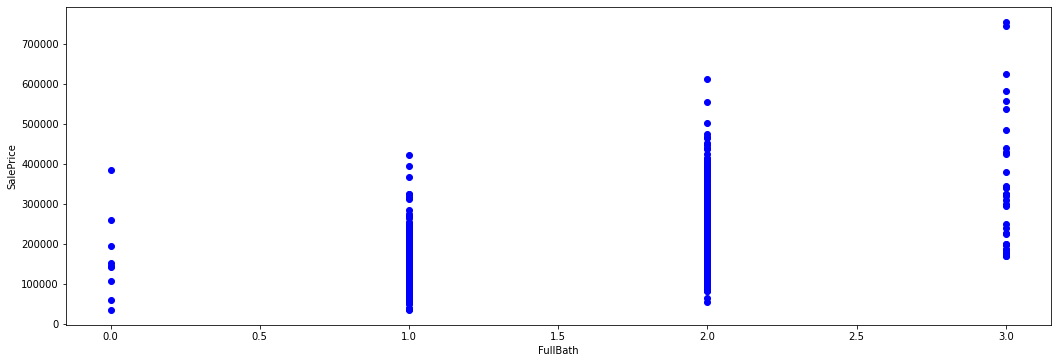

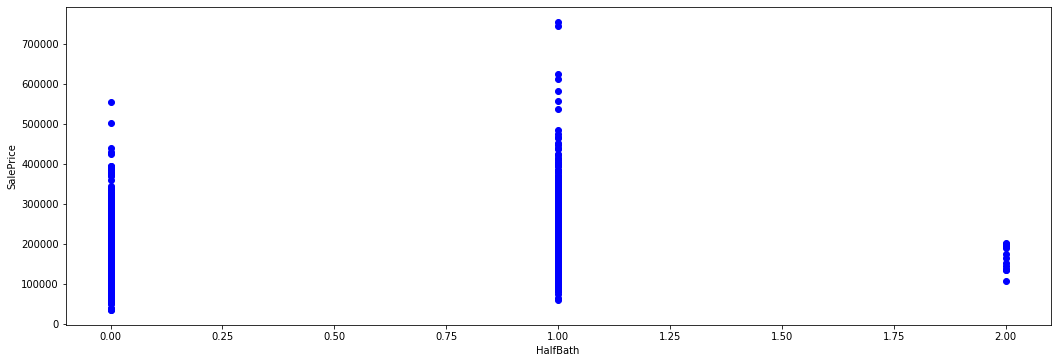

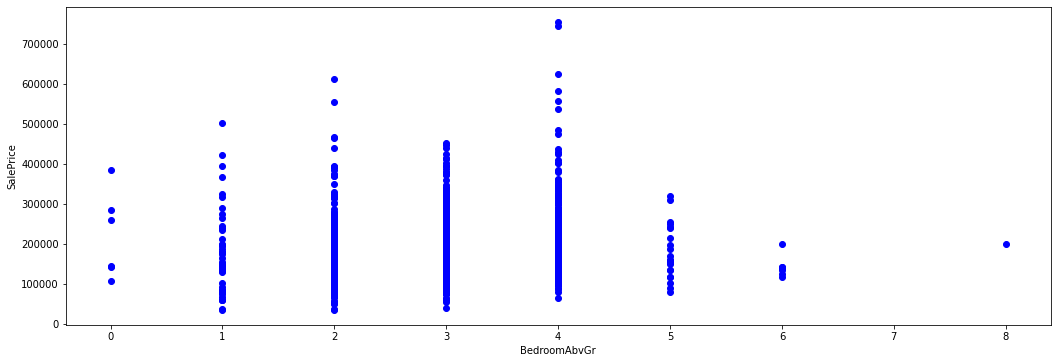

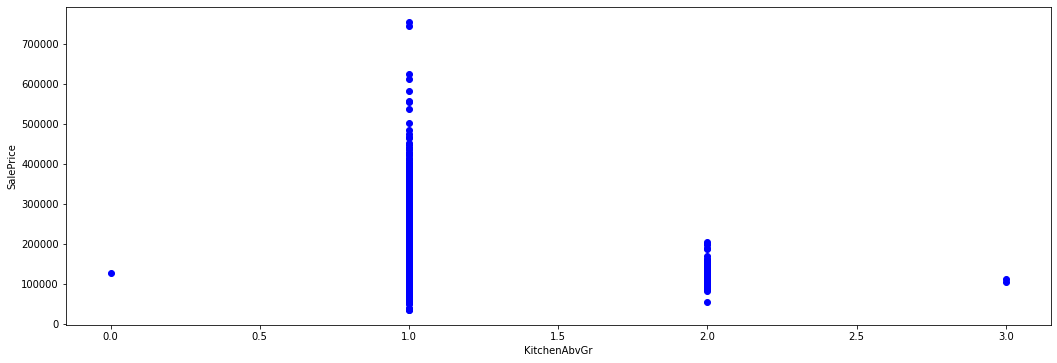

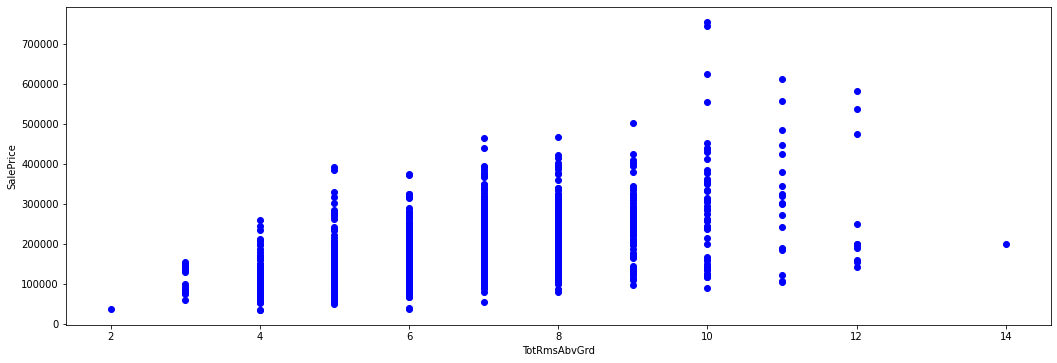

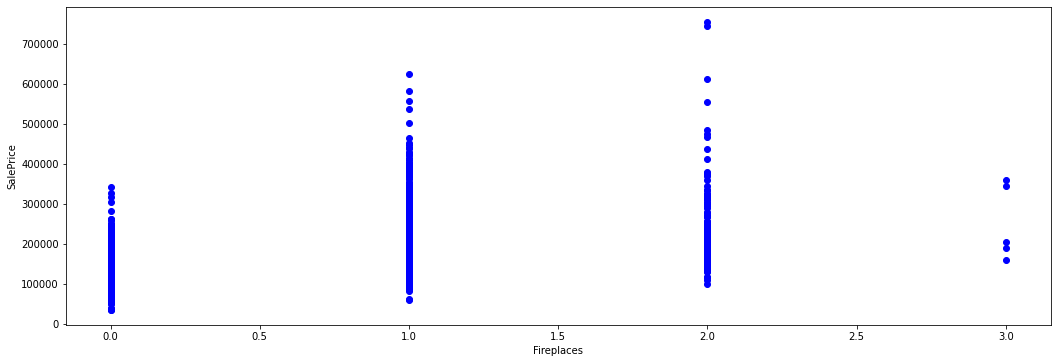

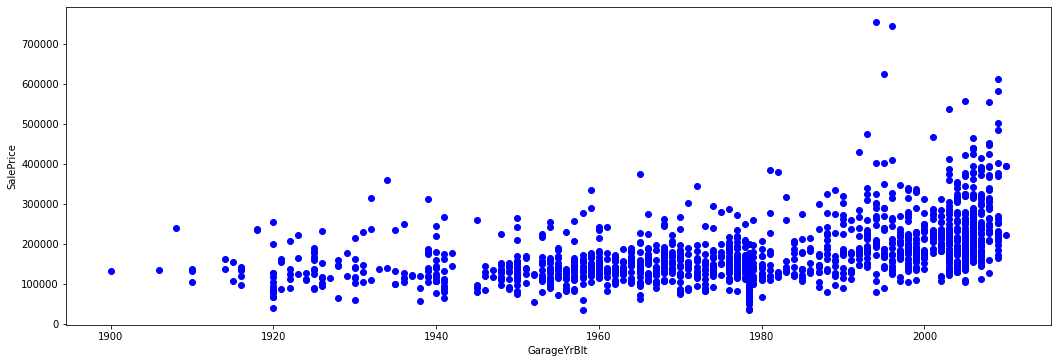

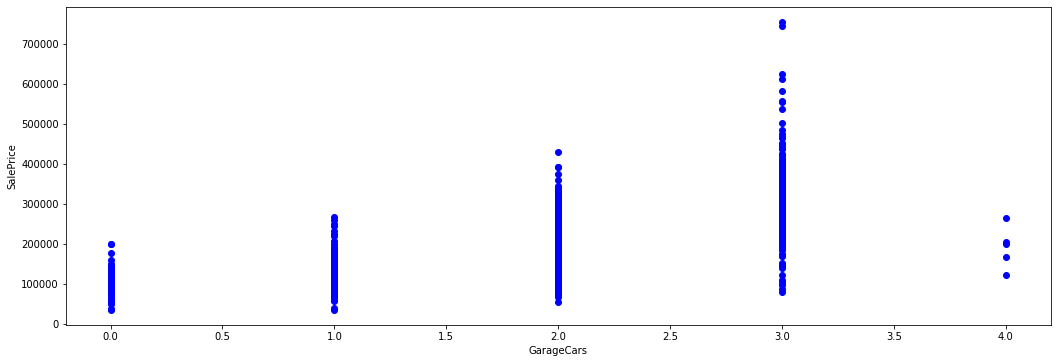

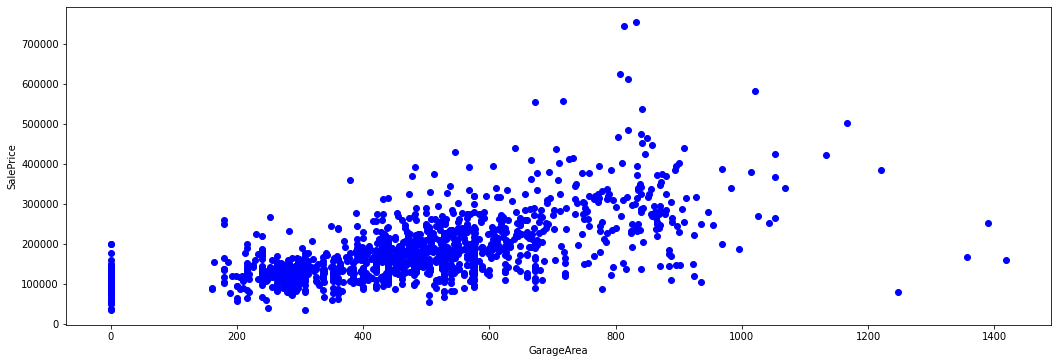

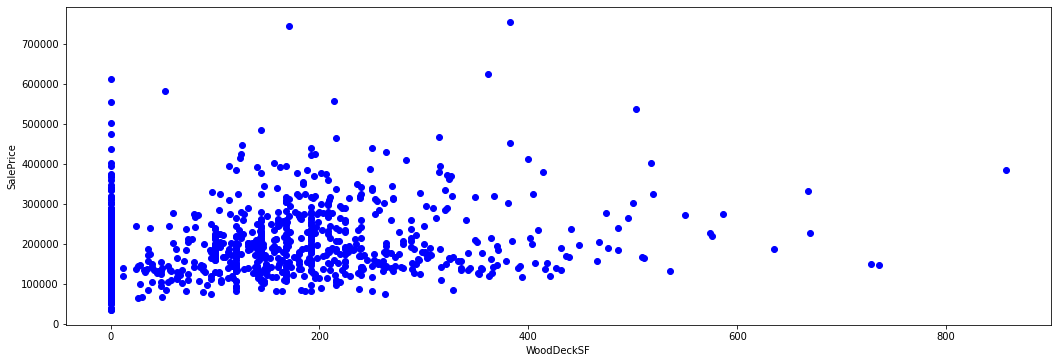

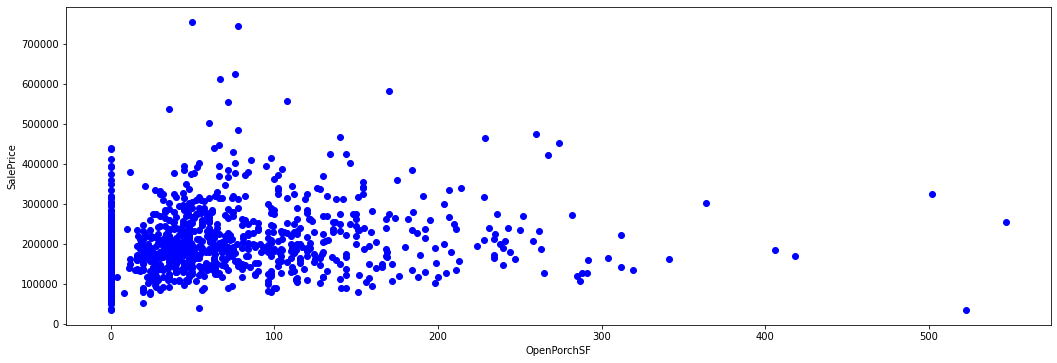

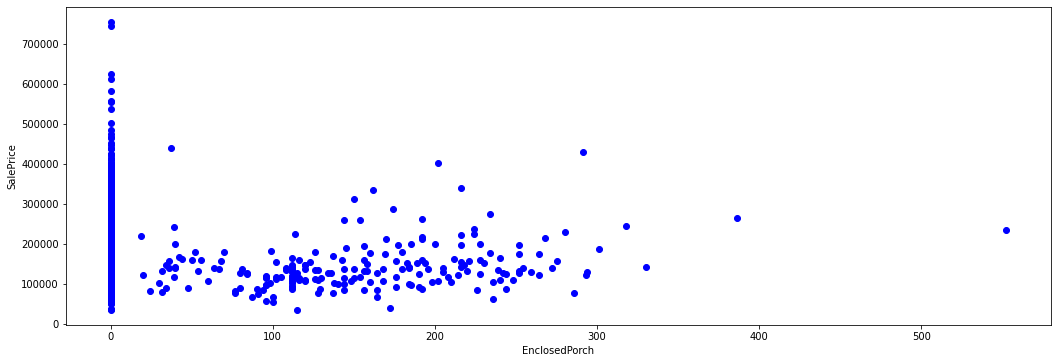

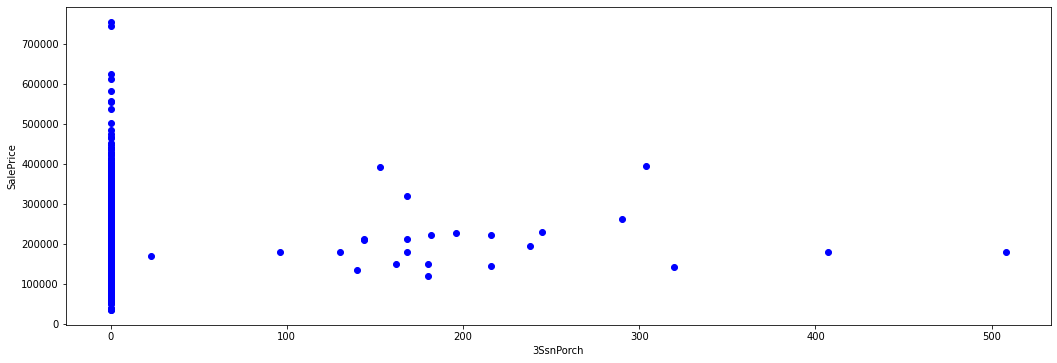

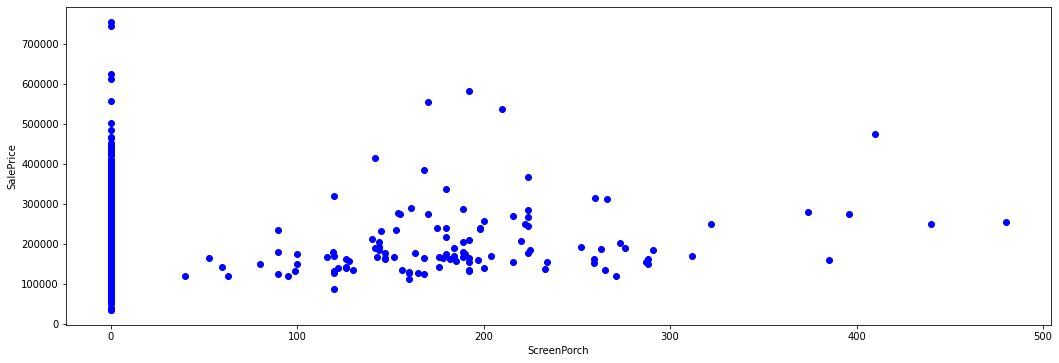

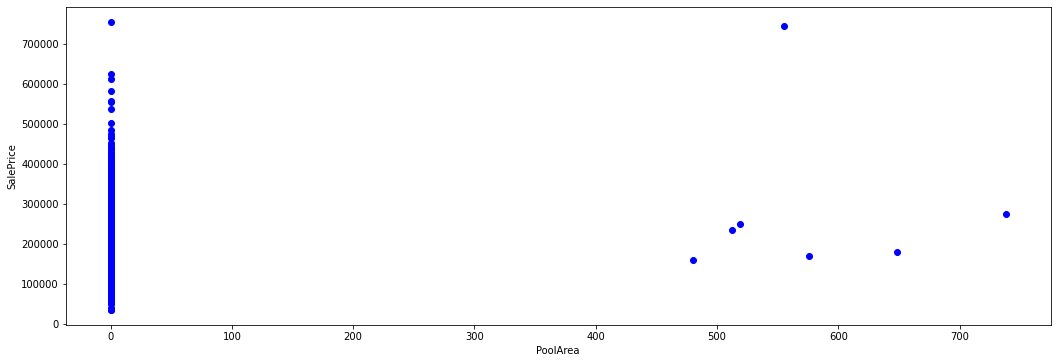

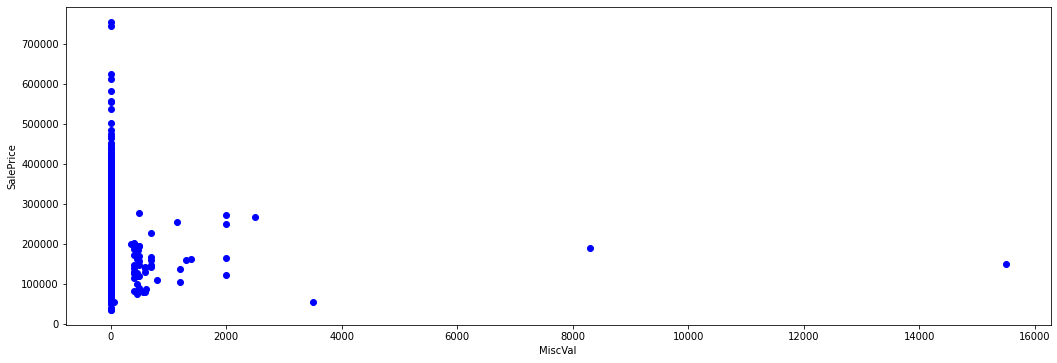

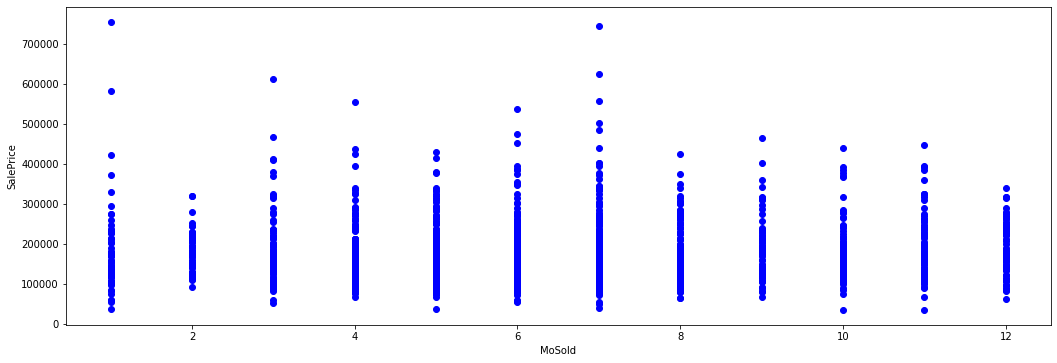

In [70]:
import matplotlib.pyplot as plt
index=1

for i in inde_var:
    plt.figure(figsize=(60, 90))
    plt.subplot(13,3,index)
    
    plt.scatter(df[i], df["SalePrice"], c ="blue")
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

- through those plots we retrieve the variables that are correlated with the SalePrice varibale

In [61]:
corr_variables=["OverallQual","OverallCond","BsmtFinSF1","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtFullBath"
               ,"BsmtHalfBath","FullBath","GarageArea","GarageCars","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces"]


4.  Encoding Categorical Features

-----------Train Data---------------------------

In [62]:
result3 = df.select_dtypes(include='object')
for i in result3:
    print(df[i].unique())

for i in result3:
    value=df[i].unique()
    df[i].replace(value,range(len(value))
                        , inplace=True)

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood

In [437]:
len(result3.columns)

39

In [438]:
for i in result3:
    print(df[i].unique())

[0 1 2 3 4]
[0 1]
[0 1 2 3]
[0 1 2 3]
[0 1]
[0 1 2 3 4]
[0 1 2]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3 4]
[0 1 2 3 4 5]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4]
[0 1]
[0 1 2 3 4]
[0 1 2 3]
[0 1 2 3 4 5 6]
[0 1 2 3 4]
[0 1 2 3 4 5]
[0 1 2]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5]


5.  Calculating Correlation between each object columns and SalePrice column

In [63]:

frame1=pd.DataFrame()
for i in result3:
    frame1[i]=df[i]
frame1['SalePrice']=df['SalePrice']   
X=frame1.loc[:, frame1.columns != 'SalePrice']
X.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,1,0,...,1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,2,0,2,0,0,...,0,0,0,1,1,0,0,0,0,1
4,0,0,1,0,0,1,0,3,0,0,...,0,0,1,0,0,0,0,0,0,0


<h4>What is mutual information regression?</h4>


Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [64]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X,frame1['SalePrice'])
mutual_info

array([0.12619073, 0.00142202, 0.10369816, 0.02285332, 0.        ,
       0.0231466 , 0.        , 0.12567257, 0.02583783, 0.01025535,
       0.03527533, 0.0548251 , 0.01274331, 0.        , 0.01037961,
       0.07181546, 0.10054311, 0.32051359, 0.02652272, 0.1881022 ,
       0.31224429, 0.03063205, 0.00822142, 0.09760973, 0.01603793,
       0.01464258, 0.16093345, 0.05911796, 0.05521101, 0.32733521,
       0.01117573, 0.08636553, 0.12405333, 0.24813188, 0.01832549,
       0.0206737 , 0.05401455, 0.07175695, 0.08480753])

In [65]:
#convert list to a pandas serie
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns

In [66]:
mutual_info

MSZoning         0.126191
Street           0.001422
LotShape         0.103698
LandContour      0.022853
Utilities        0.000000
LotConfig        0.023147
LandSlope        0.000000
Neighborhood     0.125673
Condition1       0.025838
Condition2       0.010255
BldgType         0.035275
HouseStyle       0.054825
RoofStyle        0.012743
RoofMatl         0.000000
Exterior1st      0.010380
Exterior2nd      0.071815
MasVnrType       0.100543
ExterQual        0.320514
ExterCond        0.026523
Foundation       0.188102
BsmtQual         0.312244
BsmtCond         0.030632
BsmtExposure     0.008221
BsmtFinType1     0.097610
BsmtFinType2     0.016038
Heating          0.014643
HeatingQC        0.160933
CentralAir       0.059118
Electrical       0.055211
KitchenQual      0.327335
Functional       0.011176
FireplaceQu      0.086366
GarageType       0.124053
GarageFinish     0.248132
GarageQual       0.018325
GarageCond       0.020674
PavedDrive       0.054015
SaleType         0.071757
SaleConditio

In [67]:
from sklearn.feature_selection import SelectPercentile
#I take the features of the highest 15 percent of dataframe mutual_info 
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=15)
selected_top_columns.fit(X, frame1['SalePrice'])
the_corr_Object=X.columns[selected_top_columns.get_support()]


so the most correlated features that we take are:

In [68]:
the_corr_Object

Index(['ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC', 'KitchenQual',
       'GarageFinish'],
      dtype='object')

so the perfect DataFrame to get a Best Predicted Model of SalePrice is :


-----------------------Train Data----------------------------------------

In [69]:
var_correlated=[]
for i in corr_variables:
    var_correlated.append(i)
for i in the_corr_Object:
    var_correlated.append(i)
df=df[var_correlated]  


In [70]:
df['SalePrice']=frame1["SalePrice"]
df.head()

,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageFinish,SalePrice
0,7,5,706,150,856,856,854,1710,1,0,...,1,8,0,0,0,0,0,0,0,208500
1,6,8,978,284,1262,1262,0,1262,0,1,...,1,6,1,1,1,0,0,1,0,181500
2,7,5,486,434,920,920,866,1786,1,0,...,1,6,1,0,0,0,0,0,0,223500
3,7,5,216,540,756,961,756,1717,1,0,...,1,7,1,1,2,1,1,0,1,140000
4,8,5,655,490,1145,1145,1053,2198,1,0,...,1,9,1,0,0,0,0,0,0,250000


---------------------Test Data-------------------------------

In [71]:
df_test=df_test[var_correlated]
df_test

,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageFinish
0,5,6,468.0,270.0,882.0,896,0,896,0.0,0.0,...,2,1,5,0,TA,CBlock,TA,TA,TA,Unf
1,6,6,923.0,406.0,1329.0,1329,0,1329,0.0,0.0,...,3,1,6,0,TA,CBlock,TA,TA,Gd,Unf
2,5,5,791.0,137.0,928.0,928,701,1629,0.0,0.0,...,3,1,6,1,TA,PConc,Gd,Gd,TA,Fin
3,6,6,602.0,324.0,926.0,926,678,1604,0.0,0.0,...,3,1,7,1,TA,PConc,TA,Ex,Gd,Fin
4,8,5,263.0,1017.0,1280.0,1280,0,1280,0.0,0.0,...,2,1,5,0,Gd,PConc,Gd,Ex,Gd,RFn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,7,0.0,546.0,546.0,546,546,1092,0.0,0.0,...,3,1,5,0,TA,CBlock,TA,Gd,TA,Unf
1455,4,5,252.0,294.0,546.0,546,546,1092,0.0,0.0,...,3,1,6,0,TA,CBlock,TA,TA,TA,Unf
1456,5,7,1224.0,0.0,1224.0,1224,0,1224,1.0,0.0,...,4,1,7,1,TA,CBlock,TA,Ex,TA,Unf
1457,5,5,337.0,575.0,912.0,970,0,970,0.0,1.0,...,3,1,6,0,TA,PConc,Gd,TA,TA,Unf


6.  Encoding Categorical Features for Test Data

In [72]:
result3 = df_test.select_dtypes(include='object')
for i in result3:
    print(df_test[i].unique())

for i in result3:
    value=df_test[i].unique()
    df_test[i].replace(value,range(len(value))
                        , inplace=True)

['TA' 'Gd' 'Ex' 'Fa']
['CBlock' 'PConc' 'BrkTil' 'Stone' 'Slab' 'Wood']
['TA' 'Gd' 'Ex' 'Fa']
['TA' 'Gd' 'Ex' 'Fa' 'Po']
['TA' 'Gd' 'Ex' 'Fa']
['Unf' 'Fin' 'RFn']


In [73]:
for i in result3:
    print(df[i].unique())

[0 1 2 3]
[0 1 2 3 4 5]
[0 1 2 3]
[0 1 2 3 4]
[0 1 2 3]
[0 1 2]


In [74]:
df_test.head()

,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageFinish
0,5,6,468.0,270.0,882.0,896,0,896,0.0,0.0,...,2,1,5,0,0,0,0,0,0,0
1,6,6,923.0,406.0,1329.0,1329,0,1329,0.0,0.0,...,3,1,6,0,0,0,0,0,1,0
2,5,5,791.0,137.0,928.0,928,701,1629,0.0,0.0,...,3,1,6,1,0,1,1,1,0,1
3,6,6,602.0,324.0,926.0,926,678,1604,0.0,0.0,...,3,1,7,1,0,1,0,2,1,1
4,8,5,263.0,1017.0,1280.0,1280,0,1280,0.0,0.0,...,2,1,5,0,1,1,1,2,1,2


7.   creating a function that calculating a some metrics to evaluate our Model

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

8.   Splitting Our Train Data 

In [76]:
from sklearn.model_selection import train_test_split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(df.iloc[:,:-1], 
                                                              df['SalePrice'], 
                                                              test_size=0.2, 
                                                              random_state=42)

In [77]:
from sklearn.metrics import r2_score
regressor = LinearRegression()
mlr = regressor.fit(X_train_temp, y_train_temp)
y_predict=mlr.predict(X_test)

scoring(mlr,X_test,y_test)


Model Performance
Mean Absolute Error: 22924.8769.
Mean Squared Error: 1324464286.6494.
R^2 Score = 0.8273.
Accuracy = 85.98%.


--------------------Generate Predictions on Test Data----------------------------------------------

In [78]:

#to check if there is a foreign feature between Train Data and Test Data
for i in df.columns:
    if(i not in df_test.columns):
        print(i)


SalePrice


In [79]:
pred_values=mlr.predict(df_test)
df_test["SalePrice"]=pred_values

df_test

,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageFinish,SalePrice
0,5,6,468.0,270.0,882.0,896,0,896,0.0,0.0,...,1,5,0,0,0,0,0,0,0,105895.229322
1,6,6,923.0,406.0,1329.0,1329,0,1329,0.0,0.0,...,1,6,0,0,0,0,0,1,0,160523.781378
2,5,5,791.0,137.0,928.0,928,701,1629,0.0,0.0,...,1,6,1,0,1,1,1,0,1,163871.075929
3,6,6,602.0,324.0,926.0,926,678,1604,0.0,0.0,...,1,7,1,0,1,0,2,1,1,182786.847625
4,8,5,263.0,1017.0,1280.0,1280,0,1280,0.0,0.0,...,1,5,0,1,1,1,2,1,2,204070.878786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,7,0.0,546.0,546.0,546,546,1092,0.0,0.0,...,1,5,0,0,0,0,1,0,0,60376.466194
1455,4,5,252.0,294.0,546.0,546,546,1092,0.0,0.0,...,1,6,0,0,0,0,0,0,0,81766.317772
1456,5,7,1224.0,0.0,1224.0,1224,0,1224,1.0,0.0,...,1,7,1,0,0,0,2,0,0,154141.884369
1457,5,5,337.0,575.0,912.0,970,0,970,0.0,1.0,...,1,6,0,0,1,1,0,0,0,84840.044348


In [40]:
filename2="C:\\Users\\aitma\\Downloads\\home-data-for-ml-course\\test.csv"
df_test1=pd.read_csv(filename2)

In [41]:
submission_test=pd.DataFrame()

In [42]:
submission_test["Id"]=df_test1["Id"]
submission_test["SalePrice"]=df_test["SalePrice"]
submission_test

,Id,SalePrice
0,1461,105895.229322
1,1462,160523.781378
2,1463,163871.075929
3,1464,182786.847625
4,1465,204070.878786
...,...,...
1454,2915,60376.466194
1455,2916,81766.317772
1456,2917,154141.884369
1457,2918,84840.044348


In [43]:
submission_test.to_csv('C:\\Users\\aitma\\Desktop\\submission_Houses.csv',index=False)